In [1]:
import h5py
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import openmc

In [2]:
def get_floor_ceiling(values):
        # min value and max value for rr floor and ceiling

    min_value = min([np.nanmin(i) for i in values])
    max_value = max([np.nanmax(i) for i in values])
    min_oom = math.floor(math.log(min_value, 10))
    max_oom = math.floor(math.log(max_value, 10))
    return 10**(min_oom),  10**(max_oom+1)

In [3]:
mcnp = ['eff3', 'fendl1', 'fendl2']

ciao = ['measured', 'omc']

ciao + mcnp

['measured', 'omc', 'eff3', 'fendl1', 'fendl2']

In [4]:
# read sinbad data
sinbad_file = h5py.File('sinbad_data.h5', 'r')

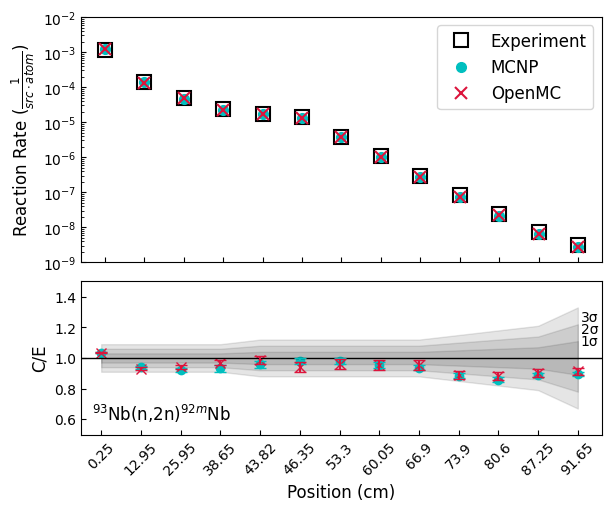

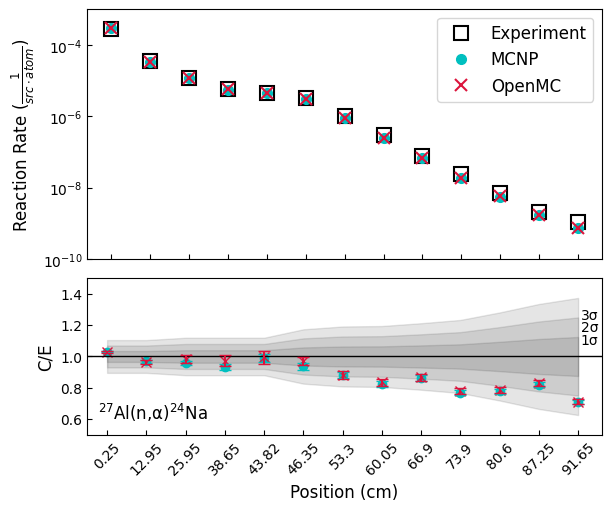

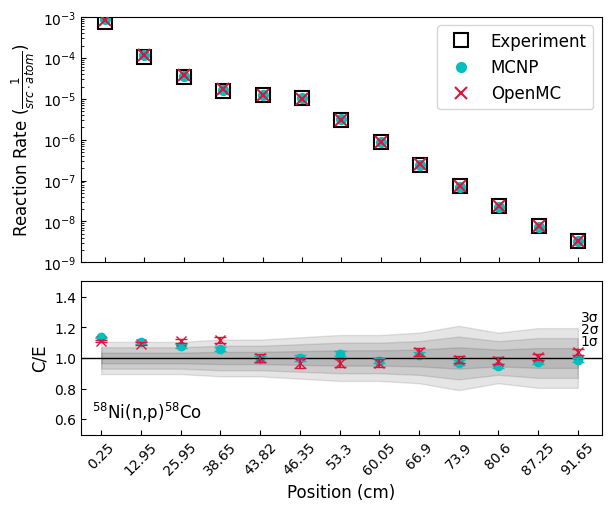

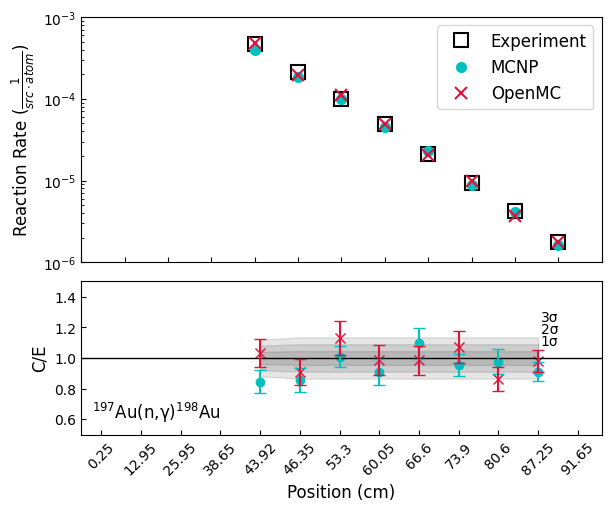

In [5]:
# retrieve activation foils on-axis results

# initialization
foil_list = ['nb93', 'al27', 'ni58', 'au197']
reaction_labels = ['$^{93}$Nb(n,2n)$^{92m}$Nb', '$^{27}$Al(n,\u03B1)$^{24}$Na', '$^{58}$Ni(n,p)$^{58}$Co', '$^{197}$Au(n,\u03B3)$^{198}$Au']

for i,foil in enumerate(foil_list):
    # get all values in plot-friendly format
    measured = sinbad_file[f'reaction_rates_onaxis/group_1/measured/{foil}/table']
    measured_rstd = measured['std. dev.'] / measured['mean']
    mcnp_fendl1 = sinbad_file[f'reaction_rates_onaxis/group_1/mcnp-fendl1/{foil}/table']
    mcnp_fendl1_rstd = np.array(mcnp_fendl1['std. dev.']) / mcnp_fendl1['mean']
    mcnp_fendl1_ce = mcnp_fendl1['mean'] / measured['mean']

    #### dummy openmc results
    omc = sinbad_file[f'reaction_rates_onaxis/group_1/mcnp-eff3/{foil}/table']
    omc_rstd = omc['std. dev.'] / omc['mean']
    omc_ce = omc['mean'] / measured['mean']

    # min value and max value for rr floor and ceiling
    floor, ceiling = get_floor_ceiling([measured['mean'], mcnp_fendl1['mean'], omc['mean']])

    # get index of last valid value for measured data for placing 1,2,3sigma strings near the grey areas
    sigma_index = (~np.isnan(measured['mean'])).cumsum(0).argmax(0)
    last_sigma = measured['std. dev.'][sigma_index]

    my_xticks = np.arange(len(measured))
    my_xlabels = measured['y(cm)']
    # plot
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), gridspec_kw={'height_ratios': [2, 1.25]}, constrained_layout=True)
    ax1.plot(my_xticks, measured['mean'], marker='s', ms=10, ls='none', mew=1.5, mec='k', mfc='none', alpha=1, label='Experiment')
    ax1.plot(my_xticks, mcnp_fendl1['mean'], marker='o', ms=7, ls='none', alpha=1, color='c', label='MCNP')
    ax1.plot(my_xticks, omc['mean'], marker='x', ms=8, mew=1.5, ls='none', color='crimson', zorder=4, label='OpenMC')
    ax1.set_yscale('log')
    ax1.set_ylim([floor, ceiling])

    ax1.set_xticks(my_xticks)
    ax1.tick_params(axis='x', labelbottom=False)
    ax1.tick_params(axis='both', which='both', direction='in')
    ax1.legend(frameon=True, fontsize=12)
    ax1.set_ylabel(r'Reaction Rate $(\frac{1}{src \cdot atom})$', fontsize=12)
    #
    ax2.fill_between(my_xticks, 1 - measured_rstd, 1 + measured_rstd, color='k', alpha=.1)
    ax2.fill_between(my_xticks, 1 - 2*measured_rstd, 1 + 2*measured_rstd, color='k', alpha=.1)
    ax2.fill_between(my_xticks, 1 - 3*measured_rstd, 1 + 3*measured_rstd, color='k', alpha=.1)
    if last_sigma < .08:
        last_sigma = .08
        sigma_start = .93
    ax2.annotate('1\u03C3', [my_xticks[sigma_index] + 0.07, 1. + 1*last_sigma], fontsize=10, clip_on=False)
    ax2.annotate('2\u03C3', [my_xticks[sigma_index] + 0.07, 1. + 2*last_sigma], fontsize=10, clip_on=False)
    ax2.annotate('3\u03C3', [my_xticks[sigma_index] + 0.07, 1. + 3*last_sigma], fontsize=10, clip_on=False)
    ax2.hlines(1.0, -1, 20, colors='k', linestyles='-', linewidth=1, label='_nolegend_')
    ax2.errorbar(my_xticks, mcnp_fendl1_ce, mcnp_fendl1_rstd*mcnp_fendl1_ce, marker='o', ms=6, capsize=4, barsabove=True, color='c', ls='none', label='_mcnp')
    ax2.errorbar(my_xticks, omc_ce, omc_rstd*omc_ce, marker='x', ms=7, capsize=4, barsabove=True, color='crimson', ls='none', label='_openmc')
    ax2.set_xlim([-0.5, my_xticks[-1] + .6])
    ax2.set_ylim([0.5, 1.5])
    ax2.set_xticks(np.arange(len(my_xticks)))
    ax2.set_xticklabels(my_xlabels)
    ax2.tick_params(axis='x', labelrotation = 45)
    ax2.tick_params(axis='both', which='both', direction='in')
    ax2.set_xlabel('Position (cm)', fontsize=12)
    ax2.set_ylabel('C/E', fontsize=12)
    ax2.annotate(reaction_labels[i], [0.02, 0.07], xycoords='axes fraction', horizontalalignment='left', verticalalignment='bottom', fontsize=12)
    # plt.savefig('tab1_' + filename_label[i] + '.png', format="png")


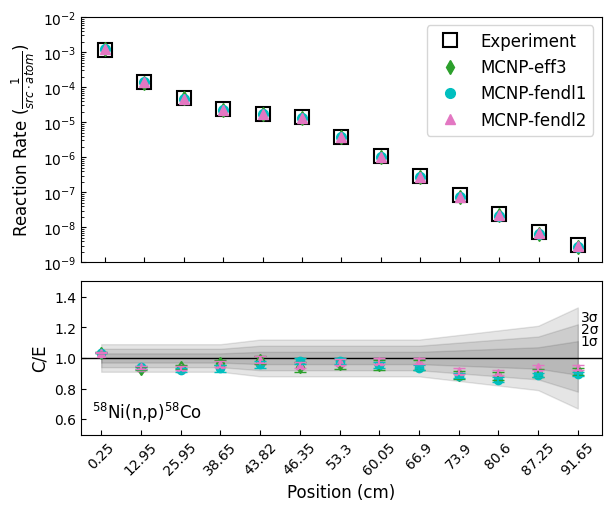

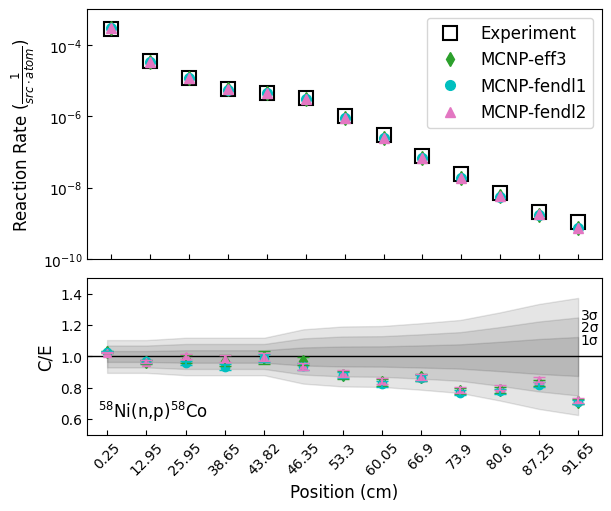

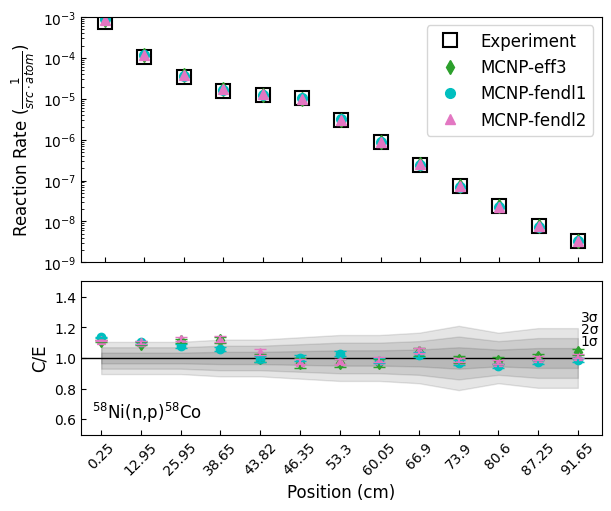

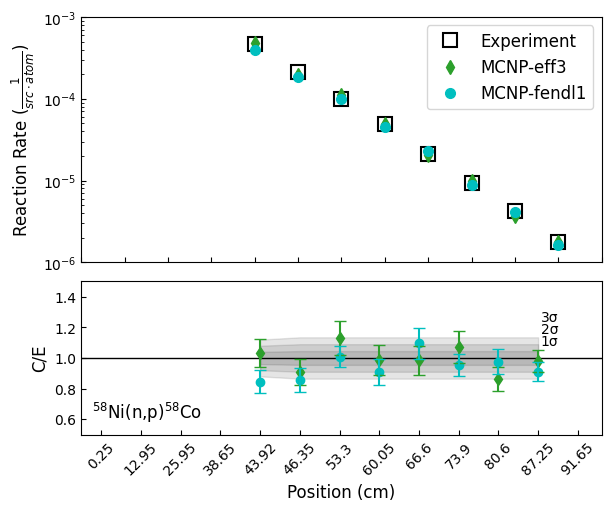

In [6]:
# retrieve activation foils on-axis results

# initialization
foil_list = ['nb93', 'al27', 'ni58', 'au197']
reaction_labels = ['$^{93}$Nb(n,2n)$^{92m}$Nb', '$^{27}$Al(n,\u03B1)$^{24}$Na', '$^{58}$Ni(n,p)$^{58}$Co', '$^{197}$Au(n,\u03B3)$^{198}$Au']

mcnp_xsl = ['eff3', 'fendl1', 'fendl2']
mcnp_markers = {'eff3':'d', 'fendl1':'o', 'fendl2':'^'}
mcnp_colors = {'eff3':'tab:green', 'fendl1':'c', 'fendl2':'tab:pink'}

path = 'reaction_rates_onaxis/group_1/'
for i,foil in enumerate(foil_list):
    # get all values in plot-friendly format
    measured = sinbad_file[path + f'measured/{foil}/table']
    measured_rstd = measured['std. dev.'] / measured['mean']

    #### dummy openmc results
    omc = sinbad_file[f'reaction_rates_onaxis/group_1/mcnp-eff3/{foil}/table']
    omc_rstd = omc['std. dev.'] / omc['mean']
    omc_ce = omc['mean'] / measured['mean']

    # min value and max value for rr floor and ceiling
    floor, ceiling = get_floor_ceiling([measured['mean'], omc['mean']])

    # get index of last valid value for measured data for placing 1,2,3sigma strings near the grey areas
    sigma_index = (~np.isnan(measured['mean'])).cumsum(0).argmax(0)
    last_sigma = measured['std. dev.'][sigma_index]

    my_xticks = np.arange(len(measured))
    my_xlabels = measured['y(cm)']
    # plot
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), gridspec_kw={'height_ratios': [2, 1.25]}, constrained_layout=True)

    ax1.plot(my_xticks, measured['mean'], marker='s', ms=10, ls='none', mew=1.5, mec='k', mfc='none', alpha=1, label='Experiment')

    for i,xsl in enumerate(mcnp_xsl):
        try:
            mcnp_rr = sinbad_file[path + 'mcnp-'+xsl + f'/{foil}/table']
            mcnp_rstd = mcnp_rr['std. dev.'] / mcnp_rr['mean']
            mcnp_ce = mcnp_rr['mean'] / measured['mean']
            ax1.plot(my_xticks, mcnp_rr['mean'], marker=mcnp_markers[xsl], ms=7, ls='none', alpha=1, color=mcnp_colors[xsl], label='MCNP-'+xsl)
            ax2.errorbar(my_xticks, mcnp_ce, mcnp_rstd*mcnp_ce, marker=mcnp_markers[xsl], ms=6, capsize=4, barsabove=True, zorder=9, color=mcnp_colors[xsl], ls='none', label='_mcnp')
        except:
            continue

    # ax1.plot(my_xticks, omc['mean'], marker='x', ms=8, mew=1.5, ls='none', color='crimson', zorder=4, label='OpenMC')
    ax1.set_yscale('log')
    ax1.set_ylim([floor, ceiling])

    ax1.set_xticks(my_xticks)
    ax1.tick_params(axis='x', labelbottom=False)
    ax1.tick_params(axis='both', which='both', direction='in')
    ax1.legend(frameon=True, fontsize=12)
    ax1.set_ylabel(r'Reaction Rate $(\frac{1}{src \cdot atom})$', fontsize=12)
    #
    ax2.fill_between(my_xticks, 1 - measured_rstd, 1 + measured_rstd, color='k', alpha=.1)
    ax2.fill_between(my_xticks, 1 - 2*measured_rstd, 1 + 2*measured_rstd, color='k', alpha=.1)
    ax2.fill_between(my_xticks, 1 - 3*measured_rstd, 1 + 3*measured_rstd, color='k', alpha=.1)
    if last_sigma < .08:
        last_sigma = .08
        sigma_start = .93
    ax2.annotate('1\u03C3', [my_xticks[sigma_index] + 0.07, 1. + 1*last_sigma], fontsize=10, clip_on=False)
    ax2.annotate('2\u03C3', [my_xticks[sigma_index] + 0.07, 1. + 2*last_sigma], fontsize=10, clip_on=False)
    ax2.annotate('3\u03C3', [my_xticks[sigma_index] + 0.07, 1. + 3*last_sigma], fontsize=10, clip_on=False)
    ax2.hlines(1.0, -1, 20, colors='k', linestyles='-', linewidth=1, label='_nolegend_')
    
    # ax2.errorbar(my_xticks, mcnp_fendl1_ce, mcnp_fendl1_rstd*mcnp_fendl1_ce, marker='o', ms=6, capsize=4, barsabove=True, color='c', ls='none', label='_mcnp')
    # ax2.errorbar(my_xticks, omc_ce, omc_rstd*omc_ce, marker='x', ms=7, capsize=4, barsabove=True, zorder=10, color='crimson', ls='none', label='_openmc')
    ax2.set_xlim([-0.5, my_xticks[-1] + .6])
    ax2.set_ylim([0.5, 1.5])
    ax2.set_xticks(np.arange(len(my_xticks)))
    ax2.set_xticklabels(my_xlabels)
    ax2.tick_params(axis='x', labelrotation = 45)
    ax2.tick_params(axis='both', which='both', direction='in')
    ax2.set_xlabel('Position (cm)', fontsize=12)
    ax2.set_ylabel('C/E', fontsize=12)
    ax2.annotate(reaction_labels[i], [0.02, 0.07], xycoords='axes fraction', horizontalalignment='left', verticalalignment='bottom', fontsize=12)
    # plt.savefig('tab1_' + filename_label[i] + '.png', format="png")

In [12]:
def _get_floor_ceiling(values):
        # min value and max value for rr floor and ceiling

    min_value = min([np.nanmin(i) for i in values])
    max_value = max([np.nanmax(i) for i in values])
    min_oom = math.floor(math.log(min_value, 10))
    max_oom = math.floor(math.log(max_value, 10))
    return 10**(min_oom),  10**(max_oom+1)

def mean(dataset):
    return dataset['mean']

def std_dev(dataset):
    return dataset['std. dev.']

def rel_std_dev(dataset):
    return dataset['std. dev.'] / dataset['mean']

def mean_ratio(dataset_1, dataset_2):
    return dataset_1 / dataset_2

def _3sigma_area(ax, ticks, std_dev):
    ax.fill_between(ticks, 1 - std_dev, 1 + std_dev, color='k', alpha=.1)
    ax.fill_between(ticks, 1 - 2*std_dev, 1 + 2*std_dev, color='k', alpha=.1)
    ax.fill_between(ticks, 1 - 3*std_dev, 1 + 3*std_dev, color='k', alpha=.1)
    
def _print_3sigma(ax, mean, std_dev):
    # get index of last valid value for measured data for placing 1,2,3sigma strings near the grey areas
    sigma_index = (~np.isnan(mean)).cumsum(0).argmax(0)
    last_sigma = std_dev[sigma_index]

    if last_sigma < .08:
        last_sigma = .08
        sigma_start = .93

    ax.annotate('1\u03C3', [my_xticks[sigma_index] + 0.07, 1. + 1*last_sigma], fontsize=10, clip_on=False)
    ax.annotate('2\u03C3', [my_xticks[sigma_index] + 0.07, 1. + 2*last_sigma], fontsize=10, clip_on=False)
    ax.annotate('3\u03C3', [my_xticks[sigma_index] + 0.07, 1. + 3*last_sigma], fontsize=10, clip_on=False)

class VisualizeResults:

    def __init__(self, fig, ax1, ax2, tickers):

        self.fig = fig
        self.ax1 = ax1
        self.ax2 = ax2
        self.tickers = tickers

    def add_measured_data(self, measured_data, ylabel:str, dtype_label=''):

        self.measured_data = measured_data

        # get all values in plot-friendly format
        measured_rstd = rel_std_dev(measured_data)

        my_xlabels = measured_data['y(cm)']
        # min value and max value for rr floor and ceiling
        floor, ceiling = _get_floor_ceiling([measured_data['mean']])

        # plot

        self.ax1.set_yscale('log')
        self.ax1.set_ylim([floor, ceiling])
        self.ax1.set_xticks(my_xticks)
        self.ax1.tick_params(axis='x', labelbottom=False)
        self.ax1.tick_params(axis='both', which='both', direction='in')
        self.ax1.set_ylabel(ylabel, fontsize=12)
        _3sigma_area(ax2, my_xticks, measured_rstd)
        _print_3sigma(ax2, measured_data['mean'], measured_data['std. dev.'])
        self.ax2.hlines(1.0, -1, 20, colors='k', linestyles='-', linewidth=1, label='_nolegend_')
        self.ax2.set_xlim([-0.5, my_xticks[-1] + .6])
        self.ax2.set_ylim([0.5, 1.5])
        self.ax2.set_xticks(np.arange(len(my_xticks)))
        self.ax2.set_xticklabels(my_xlabels)
        self.ax2.tick_params(axis='x', labelrotation = 45)
        self.ax2.tick_params(axis='both', which='both', direction='in')
        self.ax2.set_xlabel('Position (cm)', fontsize=12)
        self.ax2.set_ylabel('C/E', fontsize=12)
        self.ax2.annotate(dtype_label, [0.02, 0.07], xycoords='axes fraction', horizontalalignment='left', verticalalignment='bottom', fontsize=12)

        self.ax1.plot(self.tickers, measured['mean'], marker='s', ms=10, ls='none', mew=1.5, mec='k', mfc='none', alpha=1, label='Experiment')

        
    def add_computed_data(self, dataset, marker='o', color='tab:red', label=''):

            rstd = rel_std_dev(dataset)
            ce = mean_ratio(dataset['mean'], self.measured_data['mean'])

            floor, ceiling = _get_floor_ceiling([self.measured_data['mean'], dataset['mean']])

            self.ax1.set_ylim([floor, ceiling])
            self.ax1.plot(self.tickers, dataset['mean'], marker=marker, ms=7, ls='none', alpha=1, color=color, label=label)
            self.ax2.errorbar(self.tickers, ce, rstd*ce, marker=marker, ms=6, capsize=4, barsabove=True, zorder=9, color=color, ls='none', label='_label')
            self.ax1.legend(frameon=True, fontsize=12)




mcnp_xsl = ['eff3', 'fendl1', 'fendl2']
mcnp_markers = {'eff3':'d', 'fendl1':'o', 'fendl2':'^'}
mcnp_colors = {'eff3':'tab:green', 'fendl1':'c', 'fendl2':'tab:pink'}

        
measured = sinbad_file[path + f'measured/au197/table']
mcnp_eff3 = sinbad_file[f'reaction_rates_onaxis/group_1/mcnp-eff3/au197/table']
mcnp_fendl1 = sinbad_file[f'reaction_rates_onaxis/group_1/mcnp-fendl1/au197/table']
# mcnp_fendl2 = sinbad_file[f'reaction_rates_onaxis/group_1/mcnp-fendl2/au197/table']


ylabel = r'Reaction Rate $(\frac{1}{src \cdot atom})$'
dtype_label = reaction_labels[0]
my_xticks = np.arange(len(measured))

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 5), gridspec_kw={'height_ratios': [2, 1.25]}, constrained_layout=True)

prova = VisualizeResults(fig, ax1, ax2, my_xticks)
prova.add_measured_data(measured, ylabel, dtype_label)
prova.add_computed_data(mcnp_eff3, 'd', 'tab:green', 'mcnp-eff3')
prova.add_computed_data(mcnp_fendl1, 'o', 'c', 'mcnp-fendl1')
# prova.add_computed_data(mcnp_fendl2, '^', 'tab:pink', 'mcnp-fendl2')

KeyError: 'Unable to open object (component not found)'